In [1]:
%pip install pandas matplotlib seaborn nltk textblob wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=b7a4747043d80b1bed69bfb11ee21af862836091da0ddfb3a8013670ab8f98dd
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re
import langdetect
# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
from textblob import TextBlob
from wordcloud import WordCloud

In [7]:
data = pd.read_csv('/kaggle/input/translated-and-cleaned-tweets/Translated.csv')

data

In [8]:
stop_words = set(stopwords.words('english'))

def extract_keywords(text, top_n=10):
    words = word_tokenize(str(text).lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(top_n)

top_keywords_translated = extract_keywords(' '.join(data['Translated'].dropna()), top_n=20)

print("Top Keywords in Translated Content:", top_keywords_translated)

Top Keywords in Translated Content: [('https', 591), ('war', 308), ('putin', 253), ('ukraine', 216), ('russian', 107), ('russia', 101), ('republic', 95), ('moscow', 85), ('weapons', 81), ('ukrainian', 68), ('conflict', 60), ('zelensky', 59), ('kiev', 52), ('mariupol', 52), ('civilians', 51), ('photo', 46), ('peace', 43), ('moldova', 43), ('march', 39), ('people', 37)]


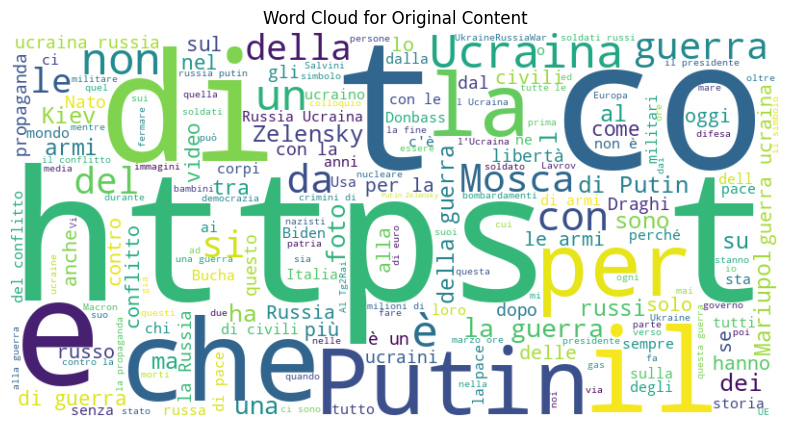

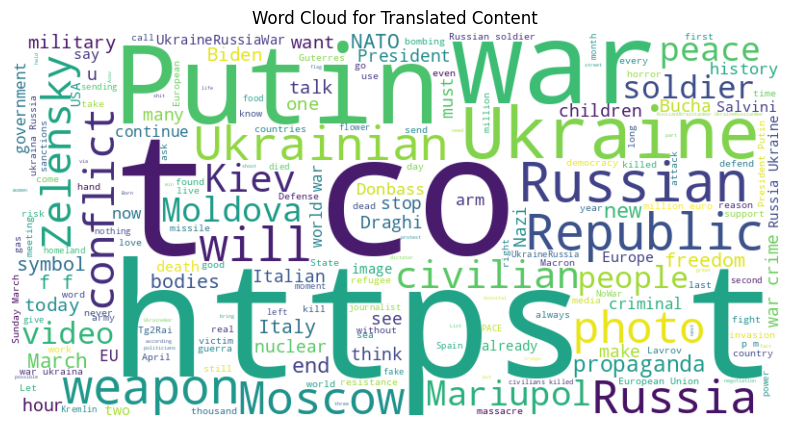

In [16]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(' '.join(data['Content'].dropna()), "Word Cloud for Original Content")
plot_wordcloud(' '.join(data['Translated'].dropna()), "Word Cloud for Translated Content")

In [24]:
filtered_data = data

In [25]:
filtered_data

,Unnamed: 0.1,Unnamed: 0,ID,URL,Type,Label,Content,Image_Name,Translated,Cleaned_Translated
0,0,0,1498022438398877704,https://twitter.com/manuela_carloni/status/149...,tweet,1,Dopo aver hackerato la tv di Stato sostituendo...,1498022438398877704.jpg,After hacking the state TV replacing propagand...,after hacking the state tv replacing propagand...
1,2,2,1497887473862467584,https://twitter.com/barbarameletto/status/1497...,tweet,2,#flowers #lovers\nFate l'amore non fate la gue...,1497887473862467584.jpg,#flowers #lovers Make love don't make war. Mar...,#flowers #lovers make love don't make war. mar...
2,3,3,1497838543619645441,https://twitter.com/_dani_ta_6/status/14978385...,tweet,2,Se solo tutti mostrassimo più amore e comprens...,1497838543619645441.jpg,If only we all showed more love and understand...,if only we all showed more love and understand...
3,4,4,1497639979534667783,https://twitter.com/GabrieleGranato/status/149...,tweet,2,Chi sono i soldati che vediamo nei video? Sono...,1497639979534667783.jpg,Who are the soldiers we see in the videos? Are...,who are the soldiers we see in the videos? are...
4,5,5,1497624763396546561,https://twitter.com/nonleggerlo/status/1497624...,tweet,1,Non credevo che #Salvini potesse peggiorare la...,1497624763396546561.jpg,I didn't think that #Salvini could make his ow...,i didn't think that #salvini could make his ow...
...,...,...,...,...,...,...,...,...,...,...
475,718,718,1538486694701408256,https://twitter.com/fratotolo2/status/15384866...,tweet,1,Se scrivo che la signora #Zelensky sarebbe sta...,1538486694701408256.jpg,If I write that Mrs. #Zelensky would be spotte...,if i write that mrs. #zelensky would be spotte...
476,721,721,1538254178413322241,https://twitter.com/104Pierpa/status/153825417...,tweet,0,#Zelensky e sua moglie #OlenaZelenska hanno ac...,1538254178413322241.jpg,#Zelensky and his wife #OlenaZelenska bought a...,#zelensky and his wife #olenazelenska bought a...
477,722,722,1537840889749458946,https://twitter.com/PartitComunista/status/153...,tweet,2,TUTTI UNITI CONTRO DRAGHI\nCONTRO LA GUERRA\nC...,1537840889749458946.jpg,ALL UNITED STATES AGAINST THE WAR AGAINST THE ...,all united states against the war against the ...
478,726,726,1535923240710946816,https://twitter.com/PartitComunista/status/153...,tweet,2,TUTTI UNITI CONTRO DRAGHI\nCONTRO LA GUERRA\nC...,1535923240710946816.jpg,ALL UNITED STATES AGAINST THE WAR AGAINST THE ...,all united states against the war against the ...


In [27]:
def clean_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r"https\S+", "", text)
        # Convert to lowercase
        text = text.lower()
        return text
    return ""
filtered_data['Cleaned_Translated'] = filtered_data['Translated'].apply(clean_text)

In [28]:
filtered_data


,Unnamed: 0.1,Unnamed: 0,ID,URL,Type,Label,Content,Image_Name,Translated,Cleaned_Translated
0,0,0,1498022438398877704,https://twitter.com/manuela_carloni/status/149...,tweet,1,Dopo aver hackerato la tv di Stato sostituendo...,1498022438398877704.jpg,After hacking the state TV replacing propagand...,after hacking the state tv replacing propagand...
1,2,2,1497887473862467584,https://twitter.com/barbarameletto/status/1497...,tweet,2,#flowers #lovers\nFate l'amore non fate la gue...,1497887473862467584.jpg,#flowers #lovers Make love don't make war. Mar...,#flowers #lovers make love don't make war. mar...
2,3,3,1497838543619645441,https://twitter.com/_dani_ta_6/status/14978385...,tweet,2,Se solo tutti mostrassimo più amore e comprens...,1497838543619645441.jpg,If only we all showed more love and understand...,if only we all showed more love and understand...
3,4,4,1497639979534667783,https://twitter.com/GabrieleGranato/status/149...,tweet,2,Chi sono i soldati che vediamo nei video? Sono...,1497639979534667783.jpg,Who are the soldiers we see in the videos? Are...,who are the soldiers we see in the videos? are...
4,5,5,1497624763396546561,https://twitter.com/nonleggerlo/status/1497624...,tweet,1,Non credevo che #Salvini potesse peggiorare la...,1497624763396546561.jpg,I didn't think that #Salvini could make his ow...,i didn't think that #salvini could make his ow...
...,...,...,...,...,...,...,...,...,...,...
475,718,718,1538486694701408256,https://twitter.com/fratotolo2/status/15384866...,tweet,1,Se scrivo che la signora #Zelensky sarebbe sta...,1538486694701408256.jpg,If I write that Mrs. #Zelensky would be spotte...,if i write that mrs. #zelensky would be spotte...
476,721,721,1538254178413322241,https://twitter.com/104Pierpa/status/153825417...,tweet,0,#Zelensky e sua moglie #OlenaZelenska hanno ac...,1538254178413322241.jpg,#Zelensky and his wife #OlenaZelenska bought a...,#zelensky and his wife #olenazelenska bought a...
477,722,722,1537840889749458946,https://twitter.com/PartitComunista/status/153...,tweet,2,TUTTI UNITI CONTRO DRAGHI\nCONTRO LA GUERRA\nC...,1537840889749458946.jpg,ALL UNITED STATES AGAINST THE WAR AGAINST THE ...,all united states against the war against the ...
478,726,726,1535923240710946816,https://twitter.com/PartitComunista/status/153...,tweet,2,TUTTI UNITI CONTRO DRAGHI\nCONTRO LA GUERRA\nC...,1535923240710946816.jpg,ALL UNITED STATES AGAINST THE WAR AGAINST THE ...,all united states against the war against the ...


In [30]:
filtered_data.to_csv('Cleaned_Translated_Final.csv')

# Embeddings

In [39]:
import pandas as pd
import numpy as np
import nltk
import spacy
import gensim
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from collections import defaultdict

# Load dataset
data = pd.read_csv("/kaggle/working/Cleaned_Translated_Final.csv")

# Extract relevant columns
texts = data["Cleaned_Translated"].astype(str).tolist()
labels = data["Label"].tolist()

# Tokenize sentences
tokenized_texts = [word_tokenize(text.lower()) for text in texts]

# Train Word2Vec Model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Load GloVe embeddings (Pre-trained)
glove_path = "/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt"
glove_embeddings = {}
with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        glove_embeddings[word] = vector

# Function to compute sentence embeddings (average of word embeddings)
def sentence_embedding(sentence, model, use_glove=False):
    words = word_tokenize(sentence.lower())
    word_vectors = []
    for word in words:
        if use_glove:
            vector = glove_embeddings.get(word)
        else:
            vector = model.wv[word] if word in model.wv else None
        if vector is not None:
            word_vectors.append(vector)
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

# Compute embeddings
X_word2vec = np.array([sentence_embedding(sent, word2vec_model) for sent in texts])
X_glove = np.array([sentence_embedding(sent, None, use_glove=True) for sent in texts])
y = np.array(labels)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

In [32]:
# Train SVM Classifier
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# Identify misclassified instances
misclassified = np.where(y_pred != y_test)[0]

# Analyze most misclassified class
misclass_counts = defaultdict(int)
for i in misclassified:
    misclass_counts[y_test[i]] += 1

most_misclassified_class = max(misclass_counts, key=misclass_counts.get)
print(f"Most misclassified class: {most_misclassified_class}")

# Extract sample misclassified sentence
misclassified_sentences = [texts[i] for i in misclassified if y_test[i] == most_misclassified_class]
sample_sentence = misclassified_sentences[0]
print(f"Sample misclassified sentence: {sample_sentence}")

Most misclassified class: 1
Sample misclassified sentence: if only we all showed more love and understanding maybe we wouldn't need to fight wars with bombs and weapons.as far as we can spend a good sunday, all our thoughts are addressed to the ukrainian people. • #pace #nowar #goodmorning #canyaman 


In [34]:
# Perform POS Tagging & Parse Tree Analysis
nlp = spacy.load("en_core_web_sm")
parsed_sentence = nlp(sample_sentence)

# POS Tags
pos_tags = [(token.text, token.pos_) for token in parsed_sentence]
print("POS Tags:", pos_tags)

# Dependency Parsing
for token in parsed_sentence:
    print(f"{token.text} -> {token.dep_} -> {token.head.text}")

# Conclusion and Fix
"""
- If words like 'not' or 'never' are not well represented in embeddings, they might mislead classification.
- If proper nouns are affecting classification, adding entity recognition (NER) can help.
- Manually improve embeddings by ensuring critical words have distinct vector representations.
"""

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


POS Tags: [('if', 'SCONJ'), ('only', 'ADV'), ('we', 'PRON'), ('all', 'PRON'), ('showed', 'VERB'), ('more', 'ADJ'), ('love', 'NOUN'), ('and', 'CCONJ'), ('understanding', 'NOUN'), ('maybe', 'ADV'), ('we', 'PRON'), ('would', 'AUX'), ("n't", 'PART'), ('need', 'VERB'), ('to', 'PART'), ('fight', 'VERB'), ('wars', 'NOUN'), ('with', 'ADP'), ('bombs', 'NOUN'), ('and', 'CCONJ'), ('weapons.as', 'PUNCT'), ('far', 'ADV'), ('as', 'SCONJ'), ('we', 'PRON'), ('can', 'AUX'), ('spend', 'VERB'), ('a', 'DET'), ('good', 'ADJ'), ('sunday', 'PROPN'), (',', 'PUNCT'), ('all', 'PRON'), ('our', 'PRON'), ('thoughts', 'NOUN'), ('are', 'AUX'), ('addressed', 'VERB'), ('to', 'ADP'), ('the', 'DET'), ('ukrainian', 'ADJ'), ('people', 'NOUN'), ('.', 'PUNCT'), ('•', 'NUM'), ('#', 'X'), ('pace', 'NOUN'), ('#', 'DET'), ('nowar', 'NOUN'), ('#', 'SYM'), ('goodmorning', 'NOUN'), ('#', 'DET'), ('canyaman', 'NOUN')]
if -> mark -> showed
only -> advmod -> showed
we -> nsubj -> showed
all -> appos -> we
showed -> advcl -> need
more

"\n- If words like 'not' or 'never' are not well represented in embeddings, they might mislead classification.\n- If proper nouns are affecting classification, adding entity recognition (NER) can help.\n- Manually improve embeddings by ensuring critical words have distinct vector representations.\n"

glove

In [35]:
X_glove = np.array([sentence_embedding(sent, None, use_glove=True) for sent in texts])
y = np.array(labels)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_glove, y, test_size=0.2, random_state=42)

In [36]:
# Train SVM Classifier
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56        16
           1       0.50      0.15      0.23        20
           2       0.51      0.84      0.63        43
           3       0.33      0.06      0.10        17

    accuracy                           0.51        96
   macro avg       0.48      0.40      0.38        96
weighted avg       0.48      0.51      0.44        96



In [37]:
# Identify misclassified instances
misclassified = np.where(y_pred != y_test)[0]

# Analyze most misclassified class
misclass_counts = defaultdict(int)
for i in misclassified:
    misclass_counts[y_test[i]] += 1

most_misclassified_class = max(misclass_counts, key=misclass_counts.get)
print(f"Most misclassified class: {most_misclassified_class}")

# Extract sample misclassified sentence
misclassified_sentences = [texts[i] for i in misclassified if y_test[i] == most_misclassified_class]
sample_sentence = misclassified_sentences[0]
print(f"Sample misclassified sentence: {sample_sentence}")

Most misclassified class: 1
Sample misclassified sentence: fourth. at the beginning of this week, thousands of social media users falsely claimed that this video showed the war between russia and ukraine, but it is a video of the video game "weapon 3"  always channel rossella fidanza 


In [38]:
# Perform POS Tagging & Parse Tree Analysis
nlp = spacy.load("en_core_web_sm")
parsed_sentence = nlp(sample_sentence)

# POS Tags
pos_tags = [(token.text, token.pos_) for token in parsed_sentence]
print("POS Tags:", pos_tags)

# Dependency Parsing
for token in parsed_sentence:
    print(f"{token.text} -> {token.dep_} -> {token.head.text}")


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


POS Tags: [('fourth', 'ADV'), ('.', 'PUNCT'), ('at', 'ADP'), ('the', 'DET'), ('beginning', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('week', 'NOUN'), (',', 'PUNCT'), ('thousands', 'NOUN'), ('of', 'ADP'), ('social', 'ADJ'), ('media', 'NOUN'), ('users', 'NOUN'), ('falsely', 'ADV'), ('claimed', 'VERB'), ('that', 'SCONJ'), ('this', 'DET'), ('video', 'NOUN'), ('showed', 'VERB'), ('the', 'DET'), ('war', 'NOUN'), ('between', 'ADP'), ('russia', 'PROPN'), ('and', 'CCONJ'), ('ukraine', 'ADJ'), (',', 'PUNCT'), ('but', 'CCONJ'), ('it', 'PRON'), ('is', 'AUX'), ('a', 'DET'), ('video', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('video', 'NOUN'), ('game', 'NOUN'), ('"', 'PUNCT'), ('weapon', 'NOUN'), ('3', 'NUM'), ('"', 'PUNCT'), (' ', 'SPACE'), ('always', 'ADV'), ('channel', 'VERB'), ('rossella', 'NOUN'), ('fidanza', 'NOUN')]
fourth -> ROOT -> fourth
. -> punct -> fourth
at -> prep -> claimed
the -> det -> beginning
beginning -> pobj -> at
of -> prep -> beginning
this -> det -> week
week -> pobj -> of
,

"\n- If words like 'not' or 'never' are not well represented in embeddings, they might mislead classification.\n- If proper nouns are affecting classification, adding entity recognition (NER) can help.\n- Manually improve embeddings by ensuring critical words have distinct vector representations.\n"

In [40]:
import numpy as np
from collections import defaultdict
from sklearn.metrics import classification_report

# Function to compute misclassification stats
def analyze_misclassifications(y_true, y_pred, texts, model_name):
    misclassified = np.where(y_pred != y_true)[0]

    # Count total misclassifications per class
    misclass_counts = defaultdict(int)
    for i in misclassified:
        misclass_counts[y_true[i]] += 1

    print(f"\n### {model_name} Misclassification Summary ###")
    print(f"Total Misclassified Samples: {len(misclassified)}")
    print("Misclassification Counts Per Class:")
    for label, count in misclass_counts.items():
        print(f" - Class {label}: {count}")

    # Sample misclassified sentences
    print("\nSample Misclassified Sentences:")
    for i in misclassified[:5]:  # Display first 5 misclassified samples
        print(f"Actual: {y_true[i]}, Predicted: {y_pred[i]}, Sentence: {texts[i]}")

    return misclassified

# Train/Test Split for Word2Vec
X_train_w2v, X_test_w2v, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

# Train SVM on Word2Vec
svm_w2v = SVC(kernel="linear")
svm_w2v.fit(X_train_w2v, y_train)
y_pred_w2v = svm_w2v.predict(X_test_w2v)

# Analyze misclassifications for Word2Vec
misclassified_w2v = analyze_misclassifications(y_test, y_pred_w2v, texts, "Word2Vec")

# Train/Test Split for GloVe
X_train_glove, X_test_glove, _, _ = train_test_split(X_glove, y, test_size=0.2, random_state=42)

# Train SVM on GloVe
svm_glove = SVC(kernel="linear")
svm_glove.fit(X_train_glove, y_train)
y_pred_glove = svm_glove.predict(X_test_glove)

# Analyze misclassifications for GloVe
misclassified_glove = analyze_misclassifications(y_test, y_pred_glove, texts, "GloVe")

# Compare Word2Vec vs. GloVe misclassified sentences
common_misclassified = set(misclassified_w2v) & set(misclassified_glove)
print(f"\nCommon misclassified samples in both embeddings: {len(common_misclassified)}")

# Display classification report
print("\n### Word2Vec Classification Report ###")
print(classification_report(y_test, y_pred_w2v))

print("\n### GloVe Classification Report ###")
print(classification_report(y_test, y_pred_glove))



### Word2Vec Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Predicted: 2, Sentence: if only we all showed more love and understanding maybe we wouldn't need to fight wars with bombs and weapons.as far as we can spend a good sunday, all our thoughts are addressed to the ukrainian people. • #pace #nowar #goodmorning #canyaman 
Actual: 3, Predicted: 2, Sentence: war in ukraine: battle in the streets of kiev. zelensky's appeal: "let's defend the capital, weapons come in."  "direct, video and photos #ukraina #russian #war #kiev #deaths #wounded #ukraina-

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
data['Label'].value_counts()


Label
2    207
1    113
3     83
0     77
Name: count, dtype: int64

In [49]:
# Find the indices of misclassified samples for both models
common_misclassified = set(misclassified_w2v) & set(misclassified_glove)

# Print common misclassified samples with their actual label and predictions
print(f"\n### Common Misclassified Samples in Both Models: {len(common_misclassified)} ###\n")

for i in common_misclassified:
    print(f"Sentence: {texts[i]}")
    print(f"  → Actual Label: {y_test[i]}")
    print(f"  → Word2Vec Prediction: {y_pred_w2v[i]}")
    print(f"  → GloVe Prediction: {y_pred_glove[i]}")
    print("-" * 80)


### Common Misclassified Samples in Both Models: 40 ###

Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
  → Actual Label: 3
  → Word2Vec Prediction: 2
  → GloVe Prediction: 2
--------------------------------------------------------------------------------
Sentence: war in ukraine: battle in the streets of kiev. zelensky's appeal: "let's defend the capital, weapons come in."  "direct, video and photos #ukraina #russian #war #kiev #deaths #wounded #ukraina-russian #putin #russiaukraineconflict  
  → Actual Label: 3
  → Word2Vec Prediction: 2
  → GloVe Prediction: 2
--------------------------------------------------------------------------------
Sentence: fourth. at the beginning of this week, thousands of social media users falsely claimed that this video sho

In [52]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

# Assuming texts is a list of sentences/documents
tagged_data = [TaggedDocument(words=word_tokenize(doc.lower()), tags=[str(i)]) for i, doc in enumerate(texts)]

# Train Doc2Vec model
model_doc2vec = Doc2Vec(vector_size=100, window=5, min_count=2, workers=4, epochs=20)
model_doc2vec.build_vocab(tagged_data)
model_doc2vec.train(tagged_data, total_examples=model_doc2vec.corpus_count, epochs=model_doc2vec.epochs)

# Generate embeddings for each document
X_doc2vec = np.array([model_doc2vec.infer_vector(word_tokenize(doc.lower())) for doc in texts])


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert text to a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_counts = vectorizer.fit_transform(texts)

# Train LDA model
lda = LatentDirichletAllocation(n_components=10, max_iter=10, learning_method='online', random_state=42)
X_lda = lda.fit_transform(X_counts)


In [54]:
import numpy as np
from collections import defaultdict
from sklearn.metrics import classification_report
from gensim.models.doc2vec import Doc2Vec
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Function to compute misclassification stats
def analyze_misclassifications(y_true, y_pred, texts, model_name):
    misclassified = np.where(y_pred != y_true)[0]

    misclass_counts = defaultdict(int)
    for i in misclassified:
        misclass_counts[y_true[i]] += 1

    print(f"\n### {model_name} Misclassification Summary ###")
    print(f"Total Misclassified Samples: {len(misclassified)}")
    print("Misclassification Counts Per Class:")
    for label, count in misclass_counts.items():
        print(f" - Class {label}: {count}")

    print("\nSample Misclassified Sentences:")
    for i in misclassified[:5]:
        print(f"Actual: {y_true[i]}, Predicted: {y_pred[i]}, Sentence: {texts[i]}")

    return misclassified


# --- DOC2VEC ---
# Assume X_doc2vec is a matrix of document embeddings generated by a trained Doc2Vec model
X_train_doc2vec, X_test_doc2vec, y_train, y_test = train_test_split(X_doc2vec, y, test_size=0.2, random_state=42)

svm_doc2vec = SVC(kernel="linear")
svm_doc2vec.fit(X_train_doc2vec, y_train)
y_pred_doc2vec = svm_doc2vec.predict(X_test_doc2vec)

misclassified_doc2vec = analyze_misclassifications(y_test, y_pred_doc2vec, texts, "Doc2Vec")

# --- LDA ---
# Assume X_lda is a topic distribution matrix generated by an LDA model
X_train_lda, X_test_lda, _, _ = train_test_split(X_lda, y, test_size=0.2, random_state=42)

svm_lda = SVC(kernel="linear")
svm_lda.fit(X_train_lda, y_train)
y_pred_lda = svm_lda.predict(X_test_lda)

misclassified_lda = analyze_misclassifications(y_test, y_pred_lda, texts, "LDA")

# Compare Doc2Vec vs. LDA misclassified sentences
common_misclassified = set(misclassified_doc2vec) & set(misclassified_lda)
print(f"\nCommon misclassified samples in both Doc2Vec and LDA: {len(common_misclassified)}")

# Display classification reports
print("\n### Doc2Vec Classification Report ###")
print(classification_report(y_test, y_pred_doc2vec))

print("\n### LDA Classification Report ###")
print(classification_report(y_test, y_pred_lda))



### Doc2Vec Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Predicted: 2, Sentence: if only we all showed more love and understanding maybe we wouldn't need to fight wars with bombs and weapons.as far as we can spend a good sunday, all our thoughts are addressed to the ukrainian people. • #pace #nowar #goodmorning #canyaman 
Actual: 3, Predicted: 2, Sentence: war in ukraine: battle in the streets of kiev. zelensky's appeal: "let's defend the capital, weapons come in."  "direct, video and photos #ukraina #russian #war #kiev #deaths #wounded #ukraina-r

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [55]:

# Compare Word2Vec vs. GloVe misclassified sentences
common_misclassified = set(misclassified_lda) & set(misclassified_doc2vec)
print(f"\nCommon misclassified samples in both embeddings: {len(common_misclassified)}")



Common misclassified samples in both embeddings: 52


In [56]:
for i in common_misclassified:
    print(f"Sentence: {texts[i]}")
    print(f"  → Actual Label: {y_test[i]}")
    print(f"  → Word2Vec Prediction: {y_pred_w2v[i]}")
    print(f"  → GloVe Prediction: {y_pred_glove[i]}")
    print("-" * 80)

Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
  → Actual Label: 3
  → Word2Vec Prediction: 2
  → GloVe Prediction: 2
--------------------------------------------------------------------------------
Sentence: if only we all showed more love and understanding maybe we wouldn't need to fight wars with bombs and weapons.as far as we can spend a good sunday, all our thoughts are addressed to the ukrainian people. • #pace #nowar #goodmorning #canyaman 
  → Actual Label: 1
  → Word2Vec Prediction: 2
  → GloVe Prediction: 1
--------------------------------------------------------------------------------
Sentence: war in ukraine: battle in the streets of kiev. zelensky's appeal: "let's defend the capital, weapons come in."  "direct, video and photos #ukraina #russia

In [57]:
# Compare Word2Vec vs. GloVe misclassified sentences
common_misclassified = set(misclassified_lda) & set(misclassified_doc2vec) & set(misclassified_w2v) & set(misclassified_glove)
print(f"\nCommon misclassified samples in both embeddings: {len(common_misclassified)}")



Common misclassified samples in both embeddings: 40


In [58]:
for i in common_misclassified:
    print(f"Sentence: {texts[i]}")
    print(f"  → Actual Label: {y_test[i]}")
    print(f"  → Word2Vec Prediction: {y_pred_w2v[i]}")
    print(f"  → GloVe Prediction: {y_pred_glove[i]}")
    print("-" * 80)

Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
  → Actual Label: 3
  → Word2Vec Prediction: 2
  → GloVe Prediction: 2
--------------------------------------------------------------------------------
Sentence: war in ukraine: battle in the streets of kiev. zelensky's appeal: "let's defend the capital, weapons come in."  "direct, video and photos #ukraina #russian #war #kiev #deaths #wounded #ukraina-russian #putin #russiaukraineconflict  
  → Actual Label: 3
  → Word2Vec Prediction: 2
  → GloVe Prediction: 2
--------------------------------------------------------------------------------
Sentence: fourth. at the beginning of this week, thousands of social media users falsely claimed that this video showed the war between russia and ukraine, but it is a video 

In [61]:
from gensim.models import Word2Vec
from sklearn.metrics import classification_report
from collections import defaultdict
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

# Function to train Word2Vec with different context sizes
def train_word2vec_with_context(texts, context_size):
    tokenized_texts = [word_tokenize(doc.lower()) for doc in texts]
    model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=context_size, min_count=2, workers=4, sg=1)
    embeddings = np.array([np.mean([model.wv[word] for word in doc if word in model.wv] or [np.zeros(100)], axis=0) for doc in tokenized_texts])
    return embeddings

# Function to analyze misclassifications
def analyze_misclassifications(y_true, y_pred, texts, context_size):
    misclassified = np.where(y_pred != y_true)[0]
    misclass_counts = defaultdict(int)
    for i in misclassified:
        misclass_counts[y_true[i]] += 1

    print(f"\n### Word2Vec with Context Size {context_size} Misclassification Summary ###")
    print(f"Total Misclassified Samples: {len(misclassified)}")
    print("Misclassification Counts Per Class:")
    for label, count in misclass_counts.items():
        print(f" - Class {label}: {count}")

    print("\nSample Misclassified Sentences:")
    for i in misclassified[:5]:  # Display first 5 misclassified samples
        print(f"Actual: {y_true[i]}, Predicted: {y_pred[i]}, Sentence: {texts[i]}")

# List of context sizes to experiment with
context_sizes = [ 3, 5, 10, 20]

for size in context_sizes:
    X_w2v = train_word2vec_with_context(texts, size)
    X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)
    svm = SVC(kernel="linear")
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # Generate classification report
    print(f"\n### Word2Vec with Context Size {size} ###")
    print(classification_report(y_test, y_pred))

    # Analyze misclassifications
    analyze_misclassifications(y_test, y_pred, texts, size)



### Word2Vec with Context Size 3 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 3 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Word2Vec with Context Size 5 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 5 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Word2Vec with Context Size 10 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 10 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Word2Vec with Context Size 20 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 20 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
from gensim.models import Word2Vec, Doc2Vec, LdaModel
from sklearn.metrics import classification_report
from collections import defaultdict
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Function to train Word2Vec with different context sizes
def train_word2vec_with_context(texts, context_size):
    tokenized_texts = [word_tokenize(doc.lower()) for doc in texts]
    model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=context_size, min_count=2, workers=4, sg=1)
    embeddings = np.array([np.mean([model.wv[word] for word in doc if word in model.wv] or [np.zeros(100)], axis=0) for doc in tokenized_texts])
    return embeddings

# Function to train Doc2Vec with different context sizes
def train_doc2vec_with_context(texts, context_size):
    tokenized_texts = [word_tokenize(doc.lower()) for doc in texts]
    tagged_data = [gensim.models.doc2vec.TaggedDocument(words=doc, tags=[i]) for i, doc in enumerate(tokenized_texts)]
    model = Doc2Vec(vector_size=100, window=context_size, min_count=2, workers=4)
    model.build_vocab(tagged_data)
    model.train(tagged_data, total_examples=model.corpus_count, epochs=20)
    embeddings = np.array([model.dv[i] for i in range(len(texts))])
    return embeddings

# Function to train LDA and get embeddings for classification
def train_lda(texts, num_topics=10):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(texts)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    embeddings = lda.transform(X)
    return embeddings

# Function to analyze misclassifications
def analyze_misclassifications(y_true, y_pred, texts, context_size, model_name):
    misclassified = np.where(y_pred != y_true)[0]
    misclass_counts = defaultdict(int)
    for i in misclassified:
        misclass_counts[y_true[i]] += 1

    print(f"\n### {model_name} with Context Size {context_size} Misclassification Summary ###")
    print(f"Total Misclassified Samples: {len(misclassified)}")
    print("Misclassification Counts Per Class:")
    for label, count in misclass_counts.items():
        print(f" - Class {label}: {count}")

    print("\nSample Misclassified Sentences:")
    for i in misclassified[:5]:  # Display first 5 misclassified samples
        print(f"Actual: {y_true[i]}, Predicted: {y_pred[i]}, Sentence: {texts[i]}")

# List of context sizes to experiment with
[ 3, 5, 10, 20]
model_names = ['Word2Vec', 'Doc2Vec', 'LDA']

for model_name in model_names:
    for size in context_sizes:
        if model_name == 'Word2Vec':
            X_embeddings = train_word2vec_with_context(texts, size)
        elif model_name == 'Doc2Vec':
            X_embeddings = train_doc2vec_with_context(texts, size)
        elif model_name == 'LDA':
            X_embeddings = train_lda(texts, num_topics=10)
        
        X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)
        svm = SVC(kernel="linear")
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)

        # Generate classification report
        print(f"\n### {model_name} with Context Size {size} ###")
        print(classification_report(y_test, y_pred))

        # Analyze misclassifications
        analyze_misclassifications(y_test, y_pred, texts, size, model_name)



### Word2Vec with Context Size 2 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 2 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Word2Vec with Context Size 5 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 5 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Word2Vec with Context Size 10 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Word2Vec with Context Size 10 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Doc2Vec with Context Size 2 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Doc2Vec with Context Size 2 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pred

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Doc2Vec with Context Size 5 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Doc2Vec with Context Size 5 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pred

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Doc2Vec with Context Size 10 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.45      1.00      0.62        43
           3       0.00      0.00      0.00        17

    accuracy                           0.45        96
   macro avg       0.11      0.25      0.15        96
weighted avg       0.20      0.45      0.28        96


### Doc2Vec with Context Size 10 Misclassification Summary ###
Total Misclassified Samples: 53
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 20
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1, Pr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### LDA with Context Size 2 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.25      0.05      0.08        20
           2       0.43      0.93      0.59        43
           3       0.00      0.00      0.00        17

    accuracy                           0.43        96
   macro avg       0.17      0.25      0.17        96
weighted avg       0.25      0.43      0.28        96


### LDA with Context Size 2 Misclassification Summary ###
Total Misclassified Samples: 55
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 19
 - Class 2: 3
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### LDA with Context Size 5 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.25      0.05      0.08        20
           2       0.43      0.93      0.59        43
           3       0.00      0.00      0.00        17

    accuracy                           0.43        96
   macro avg       0.17      0.25      0.17        96
weighted avg       0.25      0.43      0.28        96


### LDA with Context Size 5 Misclassification Summary ###
Total Misclassified Samples: 55
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 19
 - Class 2: 3
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual: 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### LDA with Context Size 10 ###
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.25      0.05      0.08        20
           2       0.43      0.93      0.59        43
           3       0.00      0.00      0.00        17

    accuracy                           0.43        96
   macro avg       0.17      0.25      0.17        96
weighted avg       0.25      0.43      0.28        96


### LDA with Context Size 10 Misclassification Summary ###
Total Misclassified Samples: 55
Misclassification Counts Per Class:
 - Class 3: 17
 - Class 1: 19
 - Class 2: 3
 - Class 0: 16

Sample Misclassified Sentences:
Actual: 3, Predicted: 2, Sentence: after hacking the state tv replacing propaganda images with the real ones, they turned directly to putin's "against us you can't win" and to the soldiers on the front with an appeal to lay down their weapons. today you can fight a war without shooting a shot. respect 
Actual:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
